# Análisis Exploratorio de Datos
## Fundamentos del Análisis: Una Mirada Inicial a los Datos

El Análisis Exploratorio de Datos (EDA) constituye una etapa fundamental en toda investigación estadística, ya que permite comprender las características principales del conjunto de datos, identificar patrones, detectar posibles inconsistencias y orientar la preparación de la información antes del modelado.

En este estudio, el EDA tiene como propósito examinar los registros de suicidios en Colombia durante el periodo 2015–2023, con el fin de describir las variables sociodemográficas y contextuales asociadas y evaluar la calidad de los datos para la construcción de un modelo de regresión logística binaria.

En primer lugar, se realiza una revisión general del dataset, verificando el número de observaciones, la disponibilidad de variables y la presencia de valores faltantes o categorías indeterminadas. Posteriormente, se lleva a cabo un análisis univariado, en el que se describen la distribución de la variable dependiente (mecanismo de suicidio: generadores de asfixia vs otros) y de las principales variables independientes (sexo, edad, estado civil, escolaridad, escenario, zona, entre otras).

En una segunda fase, se desarrolla un análisis bivariado, explorando las asociaciones preliminares entre el mecanismo de suicidio y las variables sociodemográficas/contextuales. Esto incluye el uso de tablas de contingencia, gráficos comparativos y estimaciones de razones de momios (odds ratios) crudas en variables binarias.

Finalmente, a partir de los hallazgos del EDA, se definen las decisiones de recodificación, agrupación y preparación de variables que alimentarán el modelo de regresión logística, asegurando la validez y consistencia de los resultados.

In [2]:
import pandas as pd

url = 'https://github.com/jthowinsson/Suicidio_Colombia/raw/main/Presuntos_Suicidios._Colombia%2C_2015_a_2023.xlsx'
df = pd.read_excel(url)

In [5]:
# 1. Ver las primeras filas
print("--- Primeras filas ---")

# print(df.head()) 5 primera filas
# df.head() #muestra todas las columnas

print(df.head())  


--- Primeras filas ---
   ID  Año del hecho Grupo de edad de la victima  \
0   1           2015                   (18 a 19)   
1   2           2015                   (25 a 29)   
2   3           2015                   (35 a 39)   
3   4           2015                   (55 a 59)   
4   5           2015                   (45 a 49)   

       Grupo Mayor Menor de Edad Edad judicial         Ciclo Vital  \
0  b) Mayores de Edad (>18 años)     (18 a 19)  (18 a 28) Juventud   
1  b) Mayores de Edad (>18 años)     (25 a 28)  (18 a 28) Juventud   
2  b) Mayores de Edad (>18 años)     (35 a 39)   (29 a 59) Adultez   
3  b) Mayores de Edad (>18 años)     (55 a 59)   (29 a 59) Adultez   
4  b) Mayores de Edad (>18 años)     (45 a 49)   (29 a 59) Adultez   

  Sexo de la victima Estado Civil País de Nacimiento de la Víctima  \
0              Mujer   Soltero(a)                         Colombia   
1             Hombre   Soltero(a)                         Colombia   
2             Hombre  Unión libre

In [14]:
import pandas as pd

# === 1) Cargar datos desde GitHub ===
#url = "https://github.com/jthowinsson/Suicidio_Colombia/raw/main/Presuntos_Suicidios._Colombia%2C_2015_a_2023.xlsx"
#df = pd.read_excel(url)

# === 2) Tabla 1: Dimensiones ===
dimensiones = pd.DataFrame({
    "Registros": [df.shape[0]],
    "Variables": [df.shape[1]]
})

# === 3) Conteo por tipo de variable (más robusto) ===
n_numeric   = df.select_dtypes(include=["number"]).shape[1]
n_categ     = df.select_dtypes(include=["object", "category"]).shape[1]
n_logical   = df.select_dtypes(include=["bool"]).shape[1]
n_datetime  = df.select_dtypes(include=["datetime64"]).shape[1]  # ✅ Cambio aquí

tipos_tbl = pd.DataFrame({
    "Tipo de variable": ["Numéricas", "Categóricas", "Lógicas", "Fecha / Fecha-hora"],
    "Conteo": [n_numeric, n_categ, n_logical, n_datetime]
})
tipos_tbl["% sobre total"] = (100 * tipos_tbl["Conteo"] / df.shape[1]).round(1)

# === 4) Mostrar tablas ===
print("Dimensiones del dataset:")
display(dimensiones)

print("\nVariables por tipo:")
display(tipos_tbl)

# === 5) Opcional: visualización estilizada en Jupyter ===
tipos_styled = (tipos_tbl.style
    .format({"% sobre total": "{:.1f}"})
    .set_properties(subset=["Conteo", "% sobre total"], **{"text-align": "right"})
    .background_gradient(subset=["% sobre total"], cmap="Blues")
)

display(tipos_styled)

print("\nNota: las variables 'Categóricas' incluyen object/category; " \
"'Fecha' incluye datetime64 (con o sin zona horaria).")


Dimensiones del dataset:


,Registros,Variables
0,23544,35



Variables por tipo:


,Tipo de variable,Conteo,% sobre total
0,Numéricas,4,11.4
1,Categóricas,31,88.6
2,Lógicas,0,0.0
3,Fecha / Fecha-hora,0,0.0


,Tipo de variable,Conteo,% sobre total
0,Numéricas,4,11.4
1,Categóricas,31,88.6
2,Lógicas,0,0.0
3,Fecha / Fecha-hora,0,0.0



Nota: las variables 'Categóricas' incluyen object/category; 'Fecha' incluye datetime64 (con o sin zona horaria).


In [15]:
# 2. Contar el número de filas y columnas en el DataFrame utilizando la función shape
print(df.shape)

(23544, 35)


In [19]:
# 3. Resumir las columnas utilizando describe()para obtener la distribución de las variables,
# incluyendo la media, la mediana, el mínimo, el máximo y los diferentes cuartiles.
# df.describe()  # Resumen para columnas numéricas por defecto
# print(df.describe())  # Muestra el resumen en consola
df.describe(include='all')  # include='all' para resumir todas las columnas, no solo las numéricas

,ID,Año del hecho,Grupo de edad de la victima,Grupo Mayor Menor de Edad,Edad judicial,Ciclo Vital,Sexo de la victima,Estado Civil,País de Nacimiento de la Víctima,Escolaridad,...,Presunto Agresor,Condición de la Víctima,Medio de Desplazamiento o Transporte,Servicio del Vehículo,Clase o Tipo de Accidente,Objeto de Colisión,Servicio del Objeto de Colisión,Razón del Suicidio,Localidad del Hecho,Ancestro Racial
count,23544.000000,23544.000000,23544,23544,23544,23544,23544,23544,23544,23544,...,23544,23544,23544,23544,23544,23544,23544,23544,23544,23544
unique,NaN,NaN,17,2,17,6,2,7,34,12,...,1,1,1,1,1,1,1,21,23,8
top,NaN,NaN,(20 a 24),b) Mayores de Edad (>18 años),(20 a 24),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación básica primaria,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información,No aplica,Mestizo
freq,NaN,NaN,3413,21041,3413,10258,18928,11115,22973,6291,...,23544,23544,23544,23544,23544,23544,23544,12444,20171,19524
mean,11772.500000,2019.271577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6796.711705,2.574016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5886.750000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11772.500000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,17658.250000,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 4.  Para las variables categóricas, necesitamos utilizar el parámetro include=object.
# df.describe(include=['object', 'category'])
df.describe(include=object)  # 'object' cubre la mayoría de las variables categóricas

,Grupo de edad de la victima,Grupo Mayor Menor de Edad,Edad judicial,Ciclo Vital,Sexo de la victima,Estado Civil,País de Nacimiento de la Víctima,Escolaridad,Pertenencia Grupal,Mes del hecho,...,Presunto Agresor,Condición de la Víctima,Medio de Desplazamiento o Transporte,Servicio del Vehículo,Clase o Tipo de Accidente,Objeto de Colisión,Servicio del Objeto de Colisión,Razón del Suicidio,Localidad del Hecho,Ancestro Racial
count,23544,23544,23544,23544,23544,23544,23544,23544,23544,23544,...,23544,23544,23544,23544,23544,23544,23544,23544,23544,23544
unique,17,2,17,6,2,7,34,12,27,13,...,1,1,1,1,1,1,1,21,23,8
top,(20 a 24),b) Mayores de Edad (>18 años),(20 a 24),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación básica primaria,Ninguno,Mayo,...,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,No aplica,Sin información,No aplica,Mestizo
freq,3413,21041,3413,10258,18928,11115,22973,6291,17026,2076,...,23544,23544,23544,23544,23544,23544,23544,12444,20171,19524


In [15]:
# 2. Información general del dataset
print("\n--- Información general ---")
print(df.info())


--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    23544 non-null  int64 
 1   Año del hecho                         23544 non-null  int64 
 2   Grupo de edad de la victima           23544 non-null  object
 3   Grupo Mayor Menor de Edad             23544 non-null  object
 4   Edad judicial                         23544 non-null  object
 5   Ciclo Vital                           23544 non-null  object
 6   Sexo de la victima                    23544 non-null  object
 7   Estado Civil                          23544 non-null  object
 8   País de Nacimiento de la Víctima      23544 non-null  object
 9   Escolaridad                           23544 non-null  object
 10  Pertenencia Grupal                    23544 non-null  object
 11 

In [16]:
# 3. Estadísticas descriptivas
print("\n--- Estadísticas descriptivas ---")
print(df.describe(include='all'))


--- Estadísticas descriptivas ---
                  ID  Año del hecho Grupo de edad de la victima  \
count   23544.000000   23544.000000                       23544   
unique           NaN            NaN                          17   
top              NaN            NaN                   (20 a 24)   
freq             NaN            NaN                        3413   
mean    11772.500000    2019.271577                         NaN   
std      6796.711705       2.574016                         NaN   
min         1.000000    2015.000000                         NaN   
25%      5886.750000    2017.000000                         NaN   
50%     11772.500000    2019.000000                         NaN   
75%     17658.250000    2022.000000                         NaN   
max     23544.000000    2023.000000                         NaN   

            Grupo Mayor Menor de Edad Edad judicial        Ciclo Vital  \
count                           23544         23544              23544   
unique      

In [17]:
# 4. Valores nulos por columna
print("\n--- Valores nulos ---")
print(df.isnull().sum())


--- Valores nulos ---
ID                                      0
Año del hecho                           0
Grupo de edad de la victima             0
Grupo Mayor Menor de Edad               0
Edad judicial                           0
Ciclo Vital                             0
Sexo de la victima                      0
Estado Civil                            0
País de Nacimiento de la Víctima        0
Escolaridad                             0
Pertenencia Grupal                      0
Mes del hecho                           0
Dia del hecho                           0
Rango de Hora del Hecho X 3 Horas       0
Código Dane Municipio                   0
Municipio del hecho DANE                0
Departamento del hecho DANE             0
Código Dane Departamento                0
Escenario del Hecho                     0
Zona del Hecho                          0
Actividad Durante el Hecho              0
Circunstancia del Hecho                 0
Manera de Muerte                        0
Mecanismo C

In [18]:
# 5 Valores Faltantes
valores_faltantes = df.isnull().sum()

In [19]:
# 6 Valores únicos por columna
valores_unicos = df.nunique()

In [20]:
# Contar frecuencias de mecanismos
conteo_mecanismos = df["Mecanismo Causal"].value_counts()

print(conteo_mecanismos)

Mecanismo Causal
Generadores de asfixia          15410
Tóxico                           3829
Proyectil de arma de fuego       2345
Contundente                      1405
Corto punzante                    255
Cortante                          135
Térmico                            80
Por determinar                     35
Caústico                           19
Corto contundente                  15
Agente o mecanismo explosivo        8
Punzante                            5
Eléctrico                           2
Mecanismo o agente explosivo        1
Name: count, dtype: int64


Matriz de confusión:
[[ 232 2208]
 [ 188 4436]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.55      0.10      0.16      2440
           1       0.67      0.96      0.79      4624

    accuracy                           0.66      7064
   macro avg       0.61      0.53      0.47      7064
weighted avg       0.63      0.66      0.57      7064

AUC: 0.6080241097765047


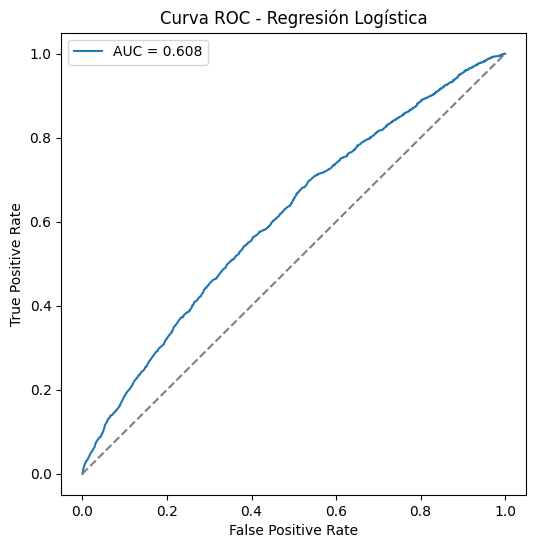

                                             Variable  Coeficiente        OR
17                             Estado Civil_No aplica     1.832006  6.246404
1                             Edad judicial_(10 a 13)     1.000773  2.720385
23              Escolaridad_Educación básica primaria     0.571314  1.770593
31                        Escolaridad_Sin escolaridad     0.533915  1.705597
32                        Escolaridad_Sin información     0.514179  1.672265
24  Escolaridad_Educación básica secundaria o secu...     0.473929  1.606293
25  Escolaridad_Educación inicial y educación pree...     0.417104  1.517561
26      Escolaridad_Educación media o secundaria alta     0.395206  1.484689
2                             Edad judicial_(14 a 17)     0.326783  1.386500
19                       Estado Civil_Sin información     0.283920  1.328327
21                           Estado Civil_Unión libre     0.224748  1.252008
20                            Estado Civil_Soltero(a)     0.164567  1.178883

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Cargar datos
# --------------------------
# url = url = 'https://github.com/jthowinsson/Suicidio_Colombia/raw/main/Presuntos_Suicidios._Colombia%2C_2015_a_2023.xlsx'
# df = pd.read_excel(url, sheet_name="Data")

# --------------------------
# 2. Recodificar variable dependiente
# --------------------------
df["mecanismo_binario"] = df["Mecanismo Causal"].apply(
    lambda x: 1 if str(x).strip().lower() == "generadores de asfixia" else 0
)

# --------------------------
# 3. Selección de variables predictoras
# (ajusta según tus columnas disponibles)
# --------------------------
X = df[["Sexo de la victima", "Edad judicial", "Estado Civil", "Escolaridad", "Zona del Hecho"]].copy()
y = df["mecanismo_binario"]

# Transformar categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

# --------------------------
# 4. Dividir train/test
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --------------------------
# 5. Ajustar modelo logístico
# --------------------------
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

# --------------------------
# 6. Evaluación
# --------------------------
y_pred = logit.predict(X_test)
y_prob = logit.predict_proba(X_test)[:,1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# --------------------------
# 7. Curva ROC
# --------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.show()

# --------------------------
# 8. Coeficientes → Odds Ratios
# --------------------------
odds_ratios = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": logit.coef_[0],
    "OR": np.exp(logit.coef_[0])
})
print(odds_ratios.sort_values(by="OR", ascending=False))
